In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [5]:
url = ('/Users/javi/Desktop/Ironhack/Entregas_de_github/Final-Project-at-Ironhack/Data/Cleaned/World_machine_learning_ready.csv')
df = pd.read_csv(url)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant features and target
features = df.drop(columns=['World_Total Population'])
target = df['World_Total Population']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(260884349920839.78, 0.9996825320854672)

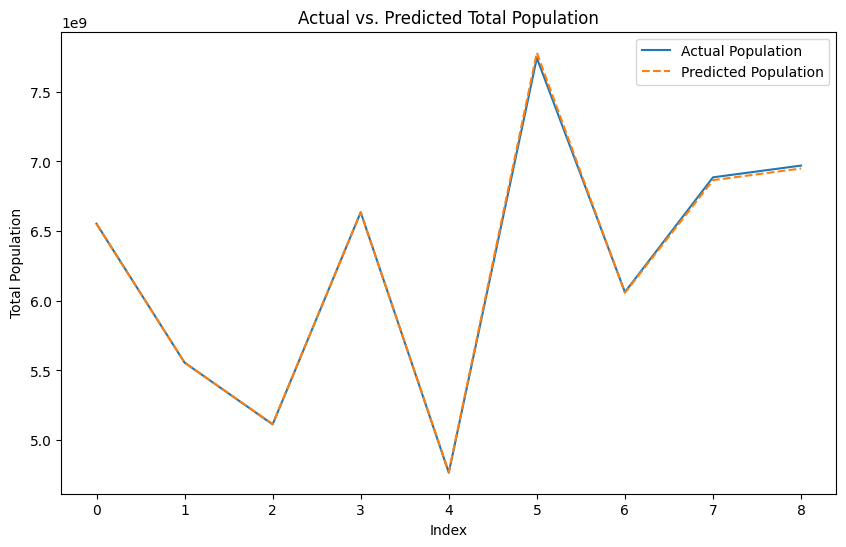

In [28]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Population')
plt.plot(range(len(y_test)), y_pred, label='Predicted Population', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Population')
plt.title('Actual vs. Predicted Total Population')
plt.legend()
plt.show()


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ...max_depth=10, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END ...max_depth=10, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_es

/Users/javi/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
27 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/javi/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/javi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/javi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(

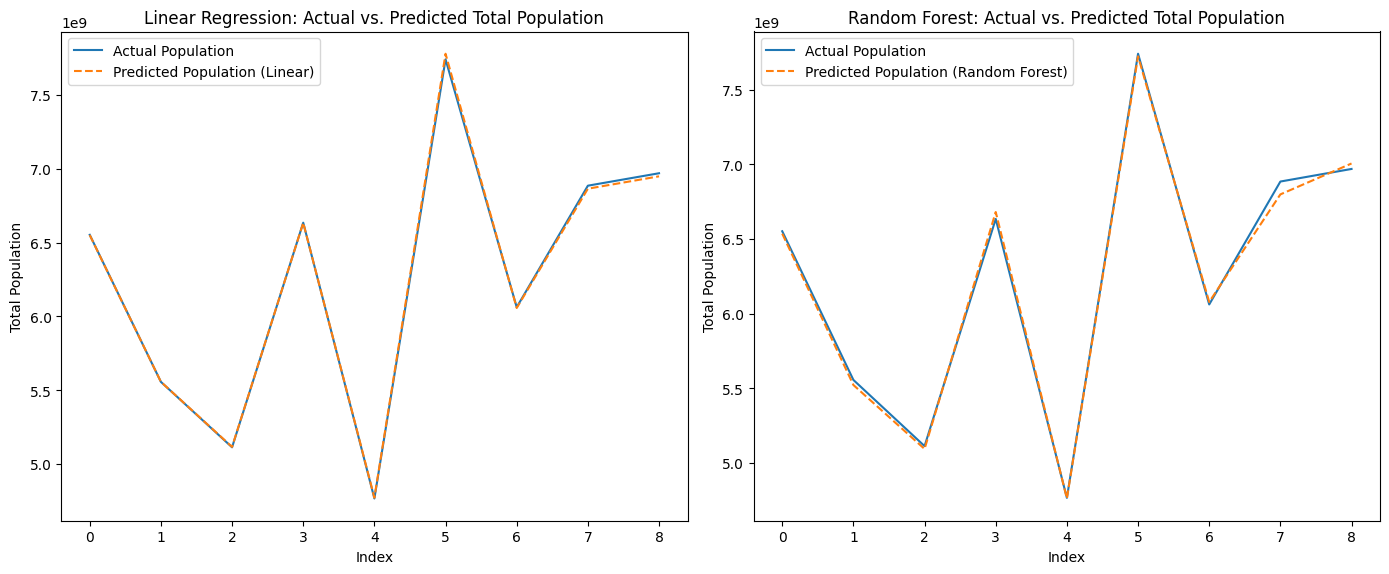

(260884349920839.78,
 0.9996825320854672,
 1475572859332780.5,
 0.9982043881185829,
 {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200})

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Prepare the data
features = df.drop(columns=['World_Total Population'])
target = df['World_Total Population']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)

# Define hyperparameters for random forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None]
}

# Grid search for Random Forest
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best random forest model
best_rf_model = grid_search.best_estimator_

# Train the models
linear_model.fit(X_train_scaled, y_train)
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the models
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Plot the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(len(y_test)), y_test, label='Actual Population')
plt.plot(range(len(y_test)), y_pred_linear, label='Predicted Population (Linear)', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Population')
plt.title('Linear Regression: Actual vs. Predicted Total Population')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(y_test)), y_test, label='Actual Population')
plt.plot(range(len(y_test)), y_pred_rf, label='Predicted Population (Random Forest)', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Population')
plt.title('Random Forest: Actual vs. Predicted Total Population')
plt.legend()

plt.tight_layout()
plt.show()

mse_linear, r2_linear, mse_rf, r2_rf, grid_search.best_params_


In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [33]:
features = df.drop(columns=['World_Total Population'])
target = df['World_Total Population']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)


In [35]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None]
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ...max_depth=10, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_e

/Users/javi/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
27 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/javi/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/javi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/javi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(

In [36]:
linear_model.fit(X_train_scaled, y_train)
best_rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=200,
                      random_state=42)

In [37]:
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_rf = best_rf_model.predict(X_test_scaled)


In [38]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


In [43]:
print('mse_linear: ',mse_linear , 'mse_rf:', mse_rf, 'r2_linear:' ,r2_linear, 'r2_rf:' ,r2_rf)


mse_linear:  260884349920839.78 mse_rf: 1475572859332780.5 r2_linear: 0.9996825320854672 r2_rf: 0.9982043881185829


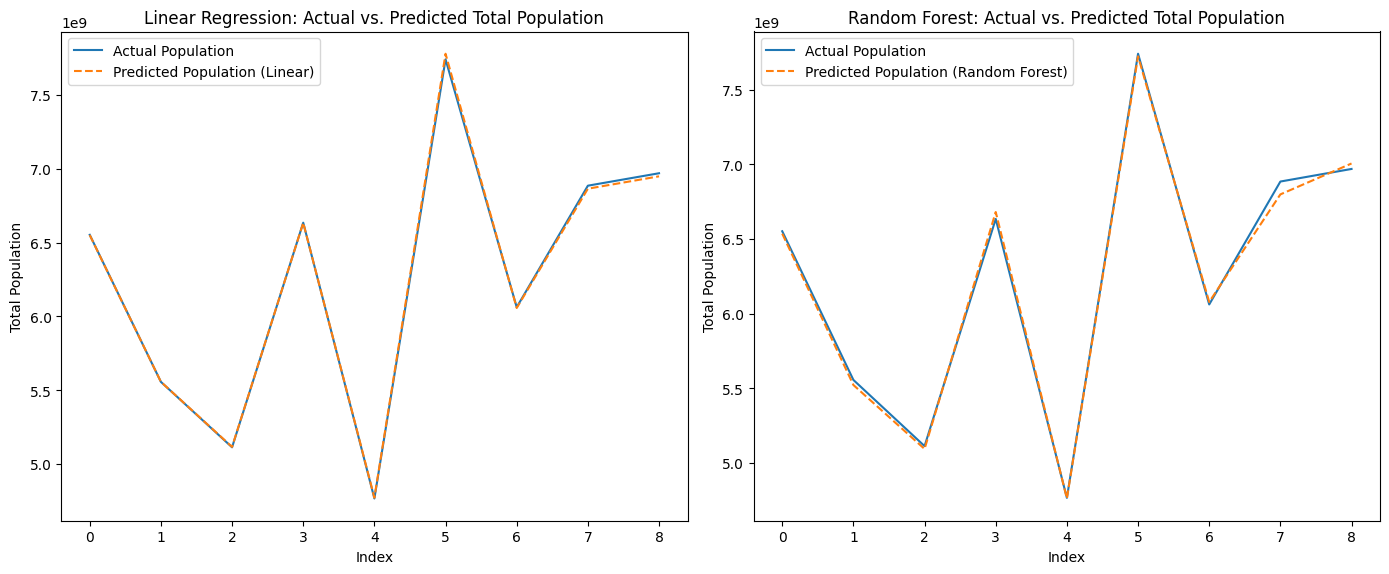

In [39]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(len(y_test)), y_test, label='Actual Population')
plt.plot(range(len(y_test)), y_pred_linear, label='Predicted Population (Linear)', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Population')
plt.title('Linear Regression: Actual vs. Predicted Total Population')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(y_test)), y_test, label='Actual Population')
plt.plot(range(len(y_test)), y_pred_rf, label='Predicted Population (Random Forest)', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Population')
plt.title('Random Forest: Actual vs. Predicted Total Population')
plt.legend()

plt.tight_layout()
plt.show()


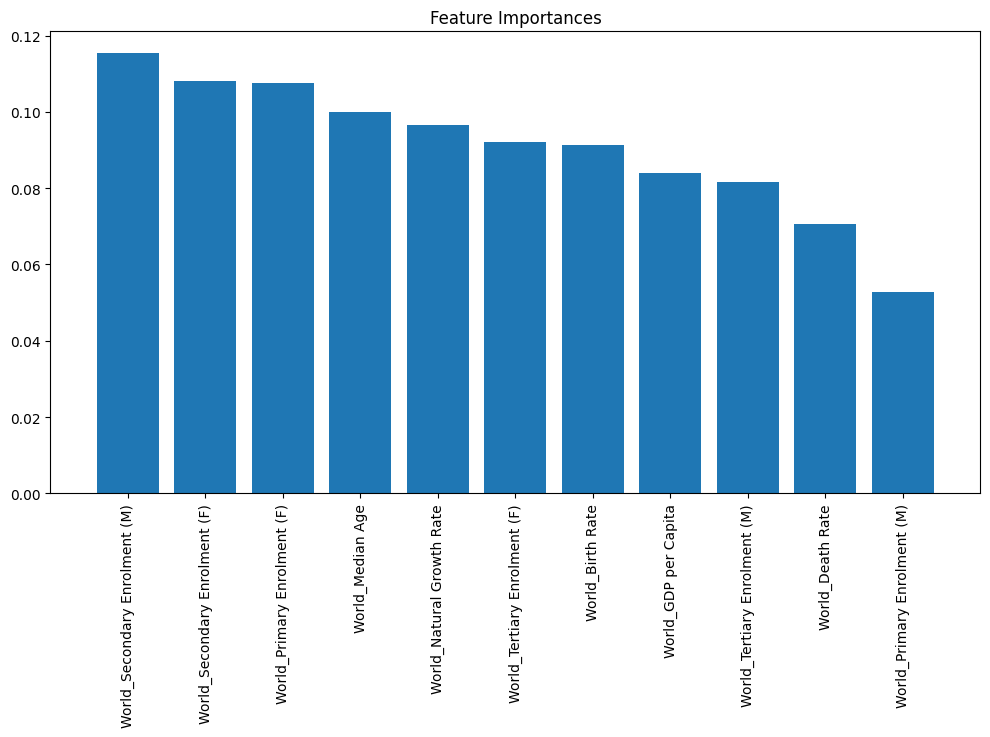

In [44]:
importances = best_rf_model.feature_importances_
feature_names = features.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()


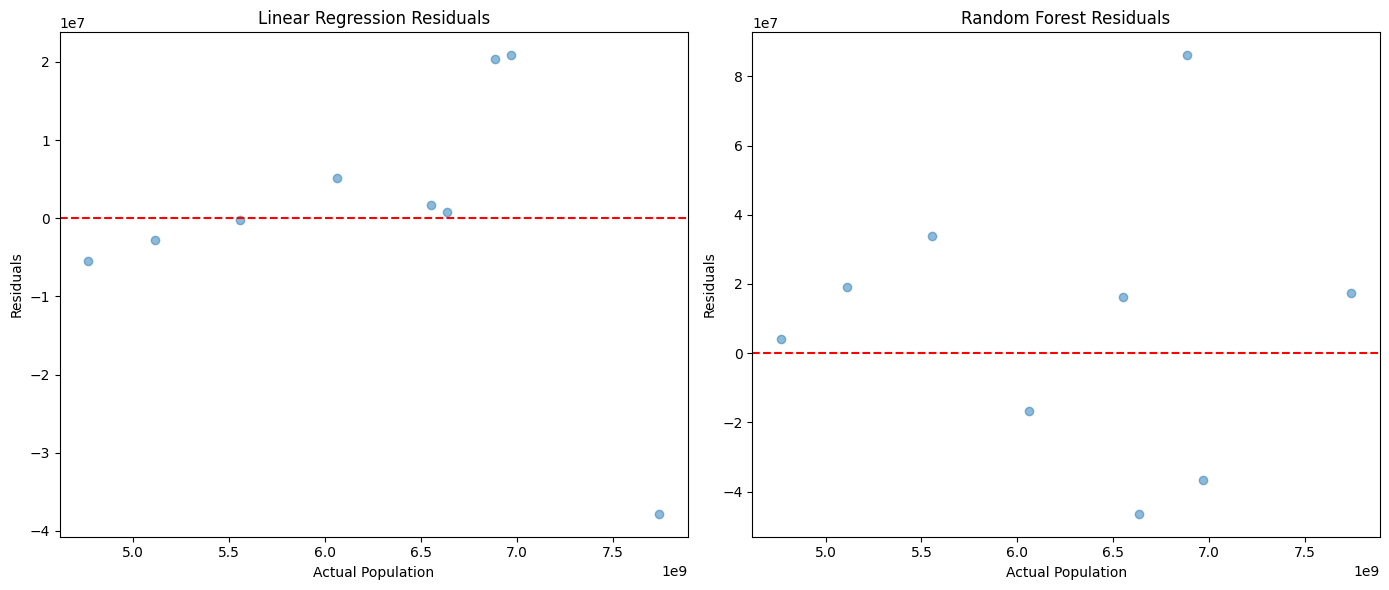

In [45]:
residuals_linear = y_test - y_pred_linear
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals_linear, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Population')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals_rf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Population')
plt.ylabel('Residuals')
plt.title('Random Forest Residuals')

plt.tight_layout()
plt.show()


In [46]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gbr = gbr_model.predict(X_test_scaled)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

mse_gbr, r2_gbr


(2709854751364385.0, 0.9967024011334388)

In [53]:
from xgboost import XGBRegressor

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

mse_xgb, r2_xgb


(1.0931378525635726e+16, 0.9866976997870682)

In [48]:
from sklearn.svm import SVR

# Initialize and train the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

mse_svr, r2_svr


(8.337509677532212e+17, -0.014584359133307023)

In [49]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the KNN model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

mse_knn, r2_knn


(5245661382716904.0, 0.993616599922449)

               Model           MSE        R2
0  Gradient Boosting  2.709855e+15  0.996702
1            XGBoost  1.093138e+16  0.986698
2                SVR  8.337510e+17 -0.014584
3                KNN  5.245661e+15  0.993617


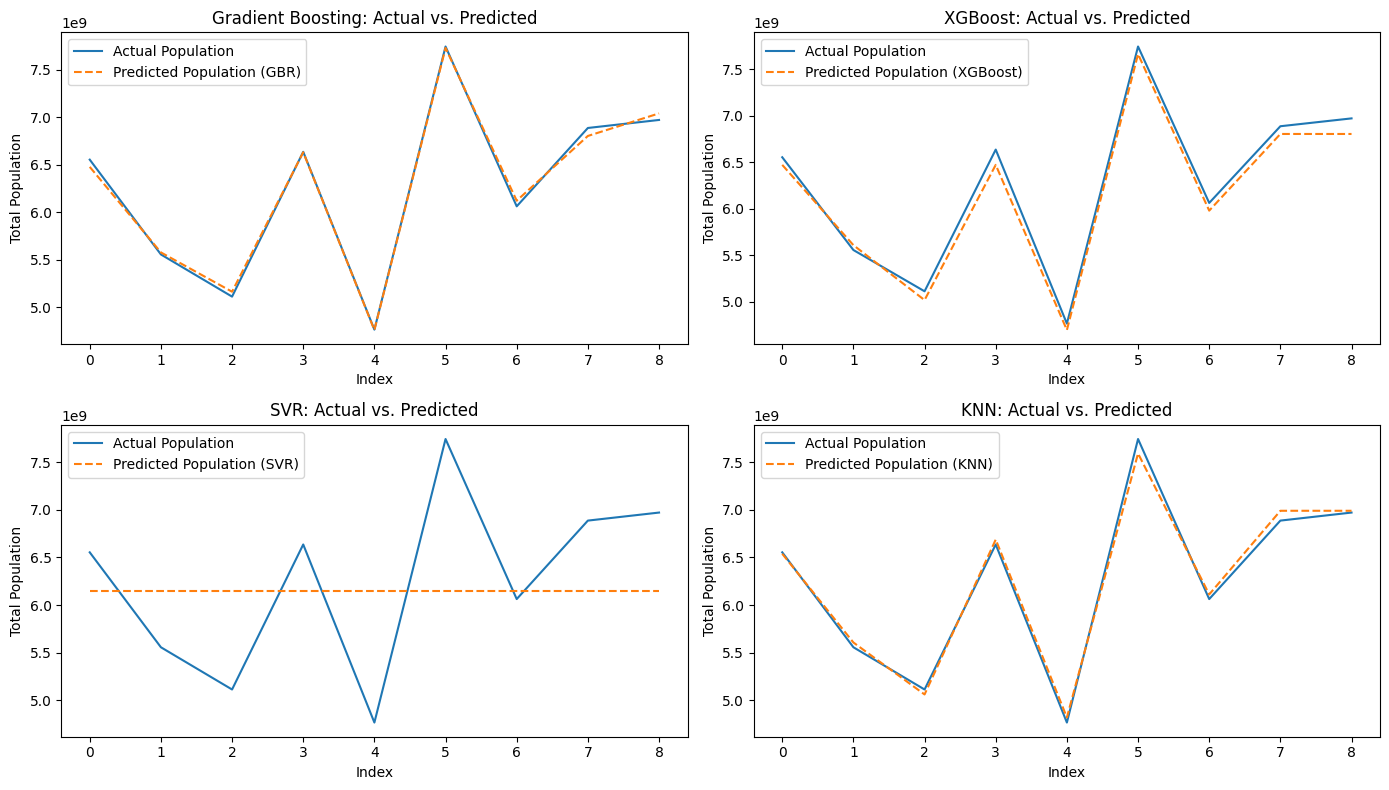

In [54]:
# Collect results
results = {
    'Model': ['Gradient Boosting', 'XGBoost', 'SVR', 'KNN'],
    'MSE': [mse_gbr, mse_xgb, mse_svr, mse_knn],
    'R2': [r2_gbr, r2_xgb, r2_svr, r2_knn]
}

results_df = pd.DataFrame(results)
print(results_df)

# Plot predictions
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(range(len(y_test)), y_test, label='Actual Population')
plt.plot(range(len(y_test)), y_pred_gbr, label='Predicted Population (GBR)', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Population')
plt.title('Gradient Boosting: Actual vs. Predicted')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(len(y_test)), y_test, label='Actual Population')
plt.plot(range(len(y_test)), y_pred_xgb, label='Predicted Population (XGBoost)', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Population')
plt.title('XGBoost: Actual vs. Predicted')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(len(y_test)), y_test, label='Actual Population')
plt.plot(range(len(y_test)), y_pred_svr, label='Predicted Population (SVR)', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Population')
plt.title('SVR: Actual vs. Predicted')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(len(y_test)), y_test, label='Actual Population')
plt.plot(range(len(y_test)), y_pred_knn, label='Predicted Population (KNN)', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Population')
plt.title('KNN: Actual vs. Predicted')
plt.legend()

plt.tight_layout()
plt.show()


In [57]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('World_machine_learning_ready.csv')
features = df.drop(columns=['World_Total Population'])
target = df['World_Total Population']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Train Random Forest
random_forest_model = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Train Gradient Boosting
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train_scaled, y_train)
y_pred_gbr = gbr_model.predict(X_test_scaled)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Train XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Train SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Train KNN
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn


/Users/javi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: 'World_machine_learning_ready.csv'

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'Normalizer': Normalizer()
}

# Model training and evaluation function
def train_and_evaluate(scaler, X_train, X_test, y_train, y_test):
    # Scale the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42),
        'SVR': SVR(kernel='rbf'),
        'KNN': KNeighborsRegressor(),
        'Neural Network': Sequential([
            Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
            Dense(64, activation='relu'),
            Dense(1, activation='linear')
        ])
    }
    
    results = {}
    
    for name, model in models.items():
        if name == 'Neural Network':
            model.compile(optimizer='adam', loss='mean_squared_error')
            model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)
            y_pred = model.predict(X_test_scaled).flatten()
        else:
            if name == 'Random Forest':
                param_grid = {'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, None]}
                grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=0)
                grid_search.fit(X_train_scaled, y_train)
                model = grid_search.best_estimator_
            else:
                model.fit(X_train_scaled, y_train)
            
            y_pred = model.predict(X_test_scaled)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'MSE': mse, 'R2': r2}
    
    return results

# Collect and display results for each scaler
for scaler_name, scaler in scalers.items():
    print(f"\nResults for {scaler_name}:")
    results = train_and_evaluate(scaler, X_train, X_test, y_train, y_test)
    for model_name, metrics in results.items():
        print(f"{model_name} - MSE: {metrics['MSE']:.2f}, R2: {metrics['R2']:.4f}")

# Example plot for neural network predictions with MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)
y_pred_nn = model.predict(X_test_scaled).flatten()

plt.figure(figsize=(7, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Population')
plt.plot(range(len(y_test)), y_pred_nn, label='Predicted Population (Neural Network)', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Population')
plt.title('Neural Network with MinMaxScaler: Actual vs. Predicted Total Population')
plt.legend()
plt.show()



Results for StandardScaler:


/Users/javi/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/javi/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
27 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/javi/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 895, in _f

In [ ]:
# Save the results to a pickle file
with open('model_results.pkl', 'wb') as f:
    pickle.dump(all_results, f)